In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan = pd.read_csv('loan_data.csv')

In [3]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan.columns


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<AxesSubplot:xlabel='purpose', ylabel='count'>

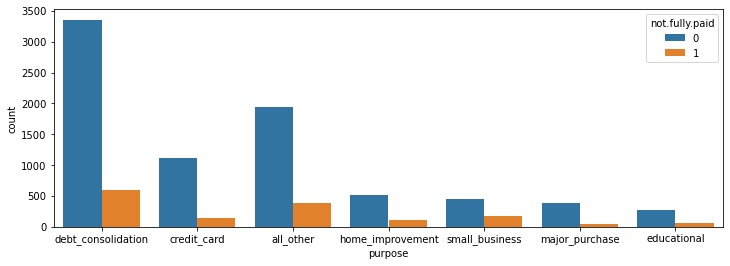

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(data=loan,x='purpose',hue='not.fully.paid' )


In [37]:
f_data = pd.get_dummies(data=loan,columns=['purpose'],drop_first=True)

In [38]:
f_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
dtf = DecisionTreeClassifier()

In [42]:
X = f_data.drop('not.fully.paid',axis=1)
y = f_data['not.fully.paid']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [61]:
dtf.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
pred_dtf = dtf.predict(X_test)

In [63]:
pred_dtf

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(pred_dtf,y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2334
           1       0.23      0.19      0.21       540

    accuracy                           0.73      2874
   macro avg       0.53      0.52      0.52      2874
weighted avg       0.71      0.73      0.72      2874



In [66]:
print(confusion_matrix(pred_dtf,y_test))

[[1993  341]
 [ 438  102]]


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
error_rate = []
for i in range(50,501,50):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    pred_rfc = rfc.predict(X_test)
    error_rate.append(np.mean(y_test != pred_rfc))

In [69]:
error_rate

[0.1569241475295755,
 0.1544885177453027,
 0.15483646485734168,
 0.151356993736952,
 0.1524008350730689,
 0.1544885177453027,
 0.15309672929714682,
 0.15274878218510787,
 0.15379262352122477,
 0.15274878218510787]

In [70]:
min(error_rate)

0.151356993736952

In [71]:
error_rate.index(min(error_rate))

3

In [72]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [75]:
print(confusion_matrix(y_test,pred_rfc))

[[2417   14]
 [ 432   11]]


In [76]:
print(classification_report(pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      2849
           1       0.02      0.44      0.05        25

    accuracy                           0.84      2874
   macro avg       0.51      0.64      0.48      2874
weighted avg       0.99      0.84      0.91      2874

